In [4]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

# Use the plot Method to render a line chart 

In [5]:
bb = data.DataReader(name = "BB", data_source = "yahoo", start = "2007-01-01", end = "2020-12-31")
bb.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,44.026669,41.703335,43.086666,42.849998,34739100.0,42.849998
2007-01-04,46.316666,42.423332,42.953335,46.189999,46007700.0,46.189999
2007-01-05,47.306667,45.166668,45.500000,47.099998,41453400.0,47.099998


<AxesSubplot:xlabel='Date'>

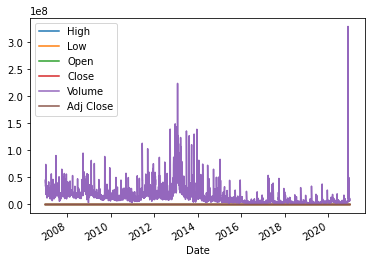

In [6]:
bb.plot()
#Targets all column automatically

<AxesSubplot:xlabel='Date'>

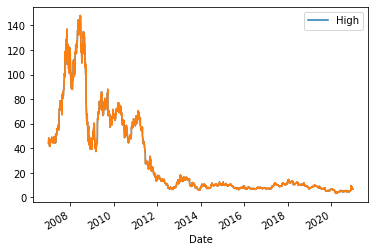

In [14]:
bb.plot(y = "High")
bb["High"].plot()

<AxesSubplot:xlabel='Date'>

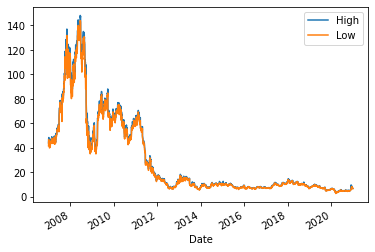

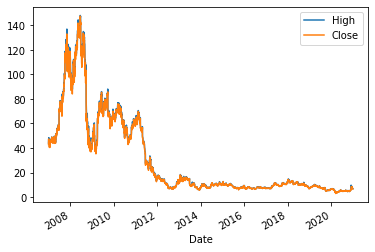

In [16]:
bb.plot(y = ["High", "Low"])
bb[["High", "Close"]].plot()

# Modifying Plot Aesthetics with matplotlib Templates

In [17]:
bb = data.DataReader(name = "BB", data_source = "yahoo", start = "2007-01-01", end = "2020-12-31")
bb.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,44.026669,41.703335,43.086666,42.849998,34739100.0,42.849998
2007-01-04,46.316666,42.423332,42.953335,46.189999,46007700.0,46.189999


In [19]:
# matplotlib library has nested package(plt), which has nested folder(style), within style we have an attribute(availble):
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:xlabel='Date'>

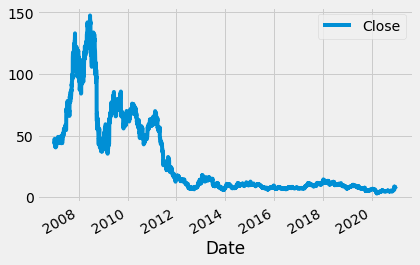

In [21]:
plt.style.use("fivethirtyeight")
bb.plot(y = "Close")

<AxesSubplot:xlabel='Date'>

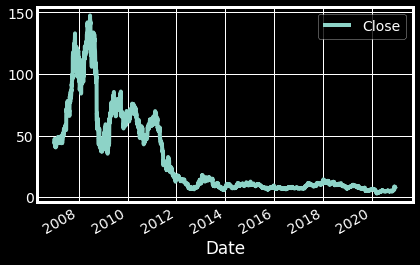

In [23]:
plt.style.use("dark_background")
bb.plot(y = "Close")

<AxesSubplot:xlabel='Date'>

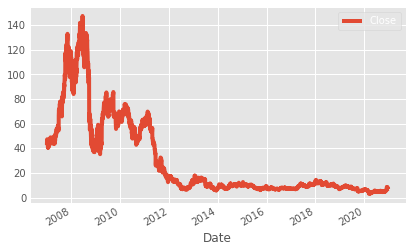

In [24]:
plt.style.use("ggplot")
bb.plot(y = "Close")

# Creating Bar Graphs to show counts:

In [25]:
bb = data.DataReader(name = "BB", data_source = "yahoo", start = "2007-01-01", end = "2020-12-31")
bb.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,44.026669,41.703335,43.086666,42.849998,34739100.0,42.849998
2007-01-04,46.316666,42.423332,42.953335,46.189999,46007700.0,46.189999


In [27]:
bb["Close"]

Date
2007-01-03    42.849998
2007-01-04    46.189999
2007-01-05    47.099998
2007-01-08    47.386665
2007-01-09    43.666668
                ...    
2020-12-24     7.060000
2020-12-28     6.880000
2020-12-29     6.770000
2020-12-30     6.670000
2020-12-31     6.630000
Name: Close, Length: 3525, dtype: float64

In [29]:
# Lets differentiate using Poor, Satisfactory, Stellar based on stock price:

def rank_performance(stock_price):
    if stock_price <= 10:
        return "Poor"
    elif stock_price <= 50:
        return "Satisfactory"
    else:
        return "Stellar"

In [30]:
bb["Close"].apply(rank_performance)

Date
2007-01-03    Satisfactory
2007-01-04    Satisfactory
2007-01-05    Satisfactory
2007-01-08    Satisfactory
2007-01-09    Satisfactory
                  ...     
2020-12-24            Poor
2020-12-28            Poor
2020-12-29            Poor
2020-12-30            Poor
2020-12-31            Poor
Name: Close, Length: 3525, dtype: object

In [32]:
# we need counts to get a good bar graph, invoke value.counts on series:
bb["Close"].apply(rank_performance).value_counts()

Poor            1541
Satisfactory    1125
Stellar          859
Name: Close, dtype: int64

<AxesSubplot:>

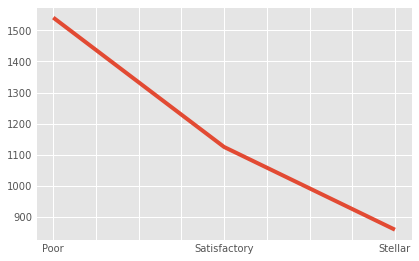

In [33]:
bb["Close"].apply(rank_performance).value_counts().plot()

<AxesSubplot:>

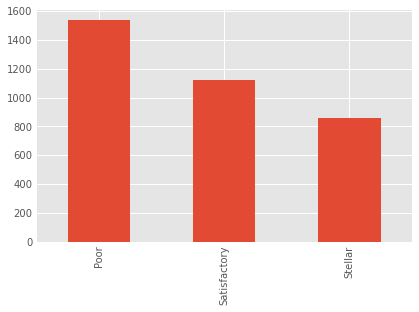

In [34]:
bb["Close"].apply(rank_performance).value_counts().plot(kind = "bar")

<AxesSubplot:>

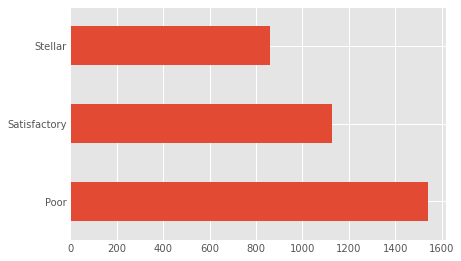

In [35]:
bb["Close"].apply(rank_performance).value_counts().plot(kind = "barh")

#  Creating Pie Charts to represent proportions:

In [37]:
bb = data.DataReader(name = "BB", data_source = "yahoo", start = "2007-01-01", end = "2020-12-31")
bb.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,44.026669,41.703335,43.086666,42.849998,34739100.0,42.849998
2007-01-04,46.316666,42.423332,42.953335,46.189999,46007700.0,46.189999


In [39]:
# lets see how many stock days come below averge and how many come above average:

bb["Close"].mean()

29.452764073094578

In [44]:
def rank_performance(stock_price):
    if stock_price >= 29.452764073094578:
        return "Above Average"
    else:
        return "Below Average"

In [45]:
bb["Close"].apply(rank_performance).head(2)

Date
2007-01-03    Above Average
2007-01-04    Above Average
Name: Close, dtype: object

In [46]:
bb["Close"].apply(rank_performance).value_counts()

Below Average    2388
Above Average    1137
Name: Close, dtype: int64

<AxesSubplot:ylabel='Close'>

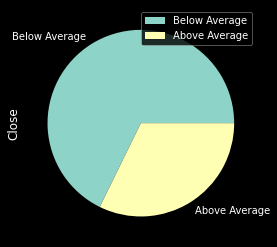

In [48]:
plt.style.use("dark_background")
bb["Close"].apply(rank_performance).value_counts().plot(kind = "pie", legend = True)